In [1]:
#import libraries

import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from collections import Counter
from sklearn.cluster import KMeans

%matplotlib inline

# Step 1: Define meta variables and functions
Let's define some meta variable which will be used in this project later. image_path will define the the relative path of the image. And max_width and max_height will be used while resizing the image before processing. clusters is the most important one here as it defines the number of colors we'll extract from the image.

In [2]:
image_path = './image/chance.jpg'
img_max_width = 600
Img_max_height = 600
clusters = 10

In [3]:
def image_info(image):
    size_in_kb = os.path.getsize(image_path) / 1024
    return "Format: {f}\nSize: {s:.2f} KB\nDimensions: {d}".format(f=image.format, s=size_in_kb, d=image.size)

# Step 2: Load the image

In [4]:
image = Image.open(image_path)

In [5]:
#print image metadata
print(image_info(image))

Format: JPEG
Size: 124.63 KB
Dimensions: (1000, 625)


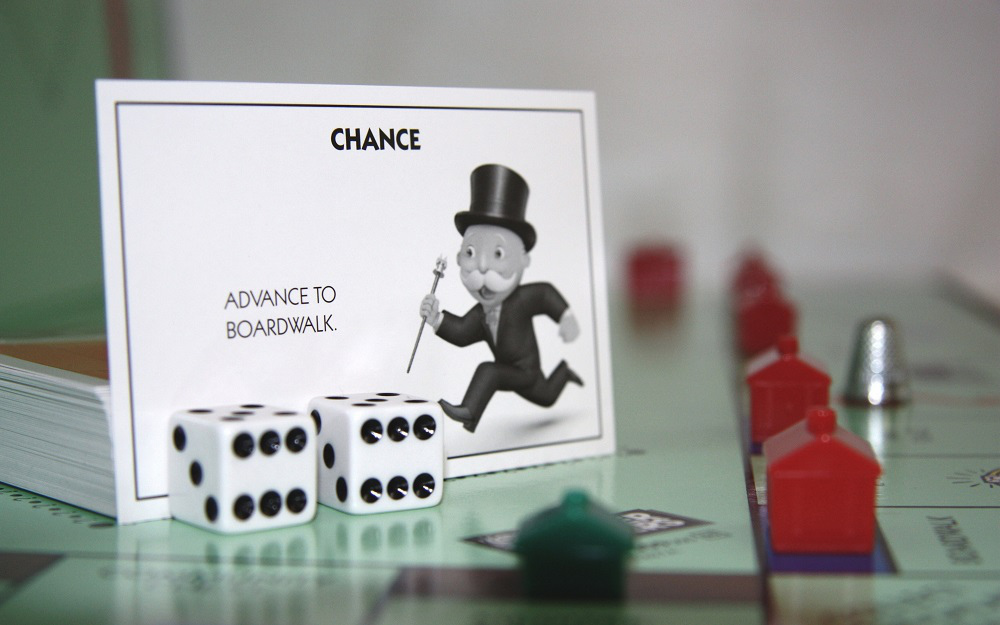

In [6]:
#display the image
image

# Step 3: Resize image for processing

In [7]:
def get_new_size(image):
    if image.width >= image.height:
        ratio = float(img_max_width / float(image.width))
    else:
        ratio = float( img_max_height / float(image.height) )
    return int(float(image.width) * ratio), int(float(image.height) * ratio)

In [8]:
# resize the image
new_width, new_height = get_new_size(image)
image = image.resize((new_width, new_height), Image.ANTIALIAS)

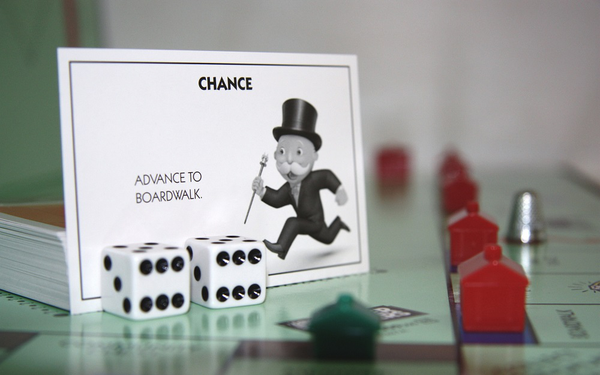

In [9]:
#display resized image
image

In [10]:
# lets see the metadata after resizing
print(image_info(image))

Format: None
Size: 124.63 KB
Dimensions: (600, 375)


# Step 4: Create numpy array from the image

In [11]:
img_array = np.array(image)
img_vector = img_array.reshape((img_array.shape[0] * img_array.shape[1], 3))

# Step 5: Create our model

In [12]:
model = KMeans(n_clusters=clusters)
labels = model.fit_predict(img_vector)
label_counts = Counter(labels)
total_count = sum(label_counts.values())

# Step 6: Convert RGB colors to hex list

In [13]:
def rgb_to_hex(rgb):
    return "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))

In [14]:
hex_colors = [ rgb_to_hex(rgb) for rgb in model.cluster_centers_ ]

In [15]:
list(zip( hex_colors, list(label_counts.values())))

[('#888f89', 11527),
 ('#eaeaef', 22876),
 ('#556252', 22693),
 ('#acb1ae', 30056),
 ('#7d2322', 37265),
 ('#212622', 22216),
 ('#c9ced1', 7188),
 ('#717c72', 54647),
 ('#46423d', 8455),
 ('#9c9f9c', 8077)]

# Step 7: Print result

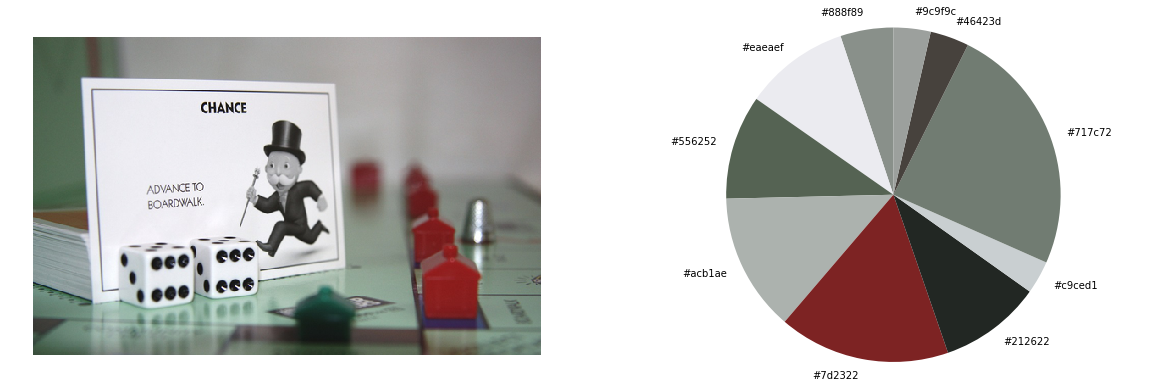

In [19]:
plt.figure(figsize=(20, 15))
plt.subplot(221)
plt.imshow(image)
plt.axis('off')

plt.subplot(222)
plt.pie(label_counts.values(), labels=hex_colors, colors=[color / 255 for color in model.cluster_centers_], startangle=90)
plt.axis('equal')
plt.show()